# Experimentos con modelos para datos de Armadillo Lab

## Load data and imports

In [1]:
!pip install cpadapter

In [20]:
import pandas as pd
from cpadapter import Adapt_to_CP
from cpadapter.performance_measures import picp, pinaw, relative_mean_width
from cpadapter.utils import train_cal_test_split
from cpadapter.visualization import band_interval_plot, line_interval_plot, conditional_band_interval_plot
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/Taller_diseño_proyecto/data armadillo/clean_data.csv"
df = pd.read_csv(path)
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,PORCENTAJE DE LOGRO,TIPO DE ESTABLECIMIENTO,NEM,PSU LENGUAJE,VIA DE INGRESO
0,0.312500,5,678.0,612.0,6
1,0.312500,3,635.0,684.0,6
2,0.333333,5,557.0,729.0,2
3,0.375000,4,643.0,660.0,6
4,0.437500,4,702.0,626.0,2
...,...,...,...,...,...
2215,0.895833,3,736.0,725.0,6
2216,0.895833,5,804.0,787.0,6
2217,0.895833,3,742.0,766.0,6
2218,0.937500,3,804.0,766.0,6


## Split data

In [14]:
# train, calibration and test datasets

x_train, y_train, x_cal, y_cal, x_test, y_test = train_cal_test_split(df, 'PORCENTAJE DE LOGRO', 0.7, 0.2, True)

print(x_train.shape)
print(x_cal.shape)
print(x_test.shape)

(1554, 4)
(444, 4)
(222, 4)


## ploting and metrics functions

In [8]:
def plot_pred(y_test, prediction):
  x = range(y_test.shape[0])
  plt.plot(x, y_test.reshape(-1), label = "real")
  plt.plot(x, prediction, label = "predicted")
  plt.title("Porcentaje de logro")
  plt.legend()
  plt.show()

def print_metrics(y_test, prediction, lb, ub):
  print('RMSE:', sqrt(mean_squared_error(y_test, prediction)))
  print('Coverage:', picp(y_test, lb, ub))
  print('Mean Interval Width:', relative_mean_width(y_test, lb, ub))

## DecisionTree

In [15]:
dt_model = DecisionTreeRegressor()
adapted_dt = Adapt_to_CP(dt_model, True)
adapted_dt.fit(x_train, y_train)

In [16]:
prediction_dt = adapted_dt.calibrate_and_predict(x_cal, y_cal, x_test, 0.8)
lb_dt = prediction_dt[0]
pred_dt = prediction_dt[1]
ub_dt = prediction_dt[2]

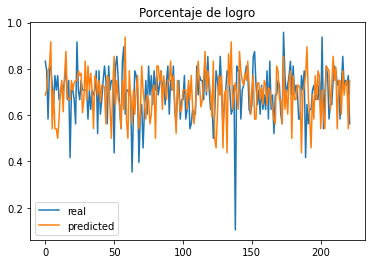

In [17]:
plot_pred(y_test, pred_dt)

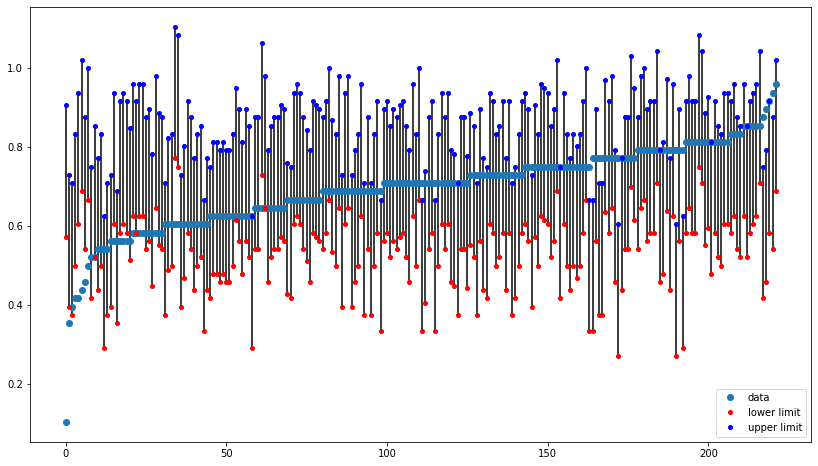

In [18]:
line_interval_plot(y_test, lb_dt, ub_dt, True)

In [19]:
print_metrics(y_test, pred_dt, lb_dt, ub_dt)

RMSE: 0.13439335124022989
Coverage: 0.8423423423423423
Mean Interval Width: 0.4790289952798386


## KNNeighbors

In [22]:
kn = KNeighborsRegressor()
adapted_kn = Adapt_to_CP(kn, True)
adapted_kn.fit(x_train, y_train)

In [23]:
prediction_kn = adapted_kn.calibrate_and_predict(x_cal, y_cal, x_test, 0.8)
lb_kn = prediction_kn[0]
pred_kn = prediction_kn[1]
ub_kn = prediction_kn[2]

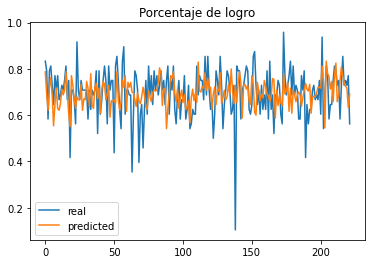

In [24]:
plot_pred(y_test, pred_kn)

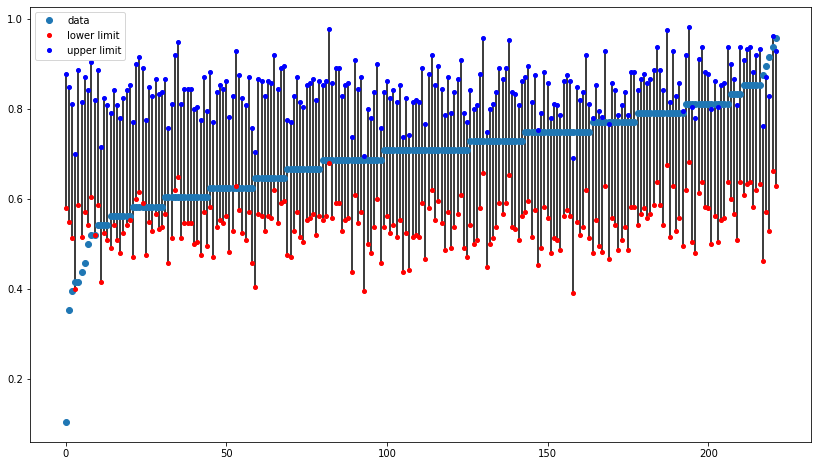

In [25]:
line_interval_plot(y_test, lb_kn, ub_kn, True)

In [26]:
print_metrics(y_test, pred_kn, lb_kn, ub_kn)

RMSE: 0.10895488994553224
Coverage: 0.8828828828828829
Mean Interval Width: 0.4311260957518541


## RandomForest

In [27]:
rf = RandomForestRegressor()
adapted_rf = Adapt_to_CP(rf, True)
adapted_rf.fit(x_train, y_train)

In [28]:
prediction_rf = adapted_rf.calibrate_and_predict(x_cal, y_cal, x_test, 0.8)
lb_rf = prediction_rf[0]
pred_rf = prediction_rf[1]
ub_rf = prediction_rf[2]

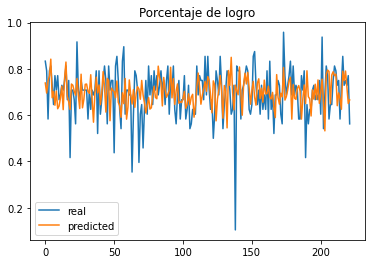

In [29]:
plot_pred(y_test, pred_rf)

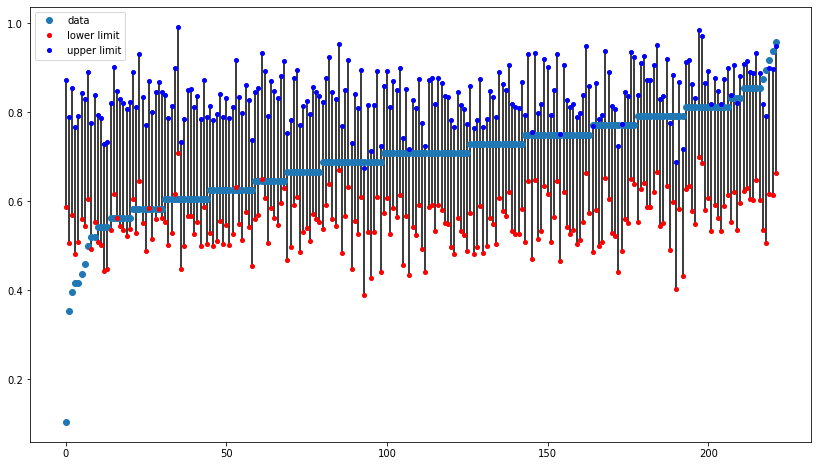

In [30]:
line_interval_plot(y_test, lb_rf, ub_rf, True)

In [31]:
print_metrics(y_test, pred_rf, lb_rf, ub_rf)

RMSE: 0.10859440076455433
Coverage: 0.8693693693693694
Mean Interval Width: 0.40942009440323723


## XGBoost

In [33]:
from xgboost import XGBRegressor

In [34]:
xg = XGBRegressor()
adapted_xg = Adapt_to_CP(xg, False)
adapted_xg.fit(x_train, y_train)

[15:21:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
prediction_xg = adapted_xg.calibrate_and_predict(x_cal, y_cal, x_test, 0.8)
lb_xg = prediction_xg[0]
pred_xg = prediction_xg[1]
ub_xg = prediction_xg[2]

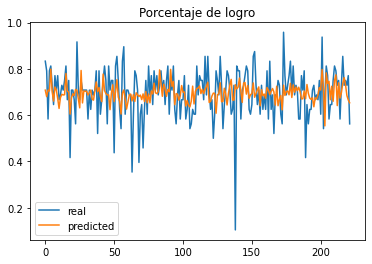

In [36]:
plot_pred(y_test, pred_xg)

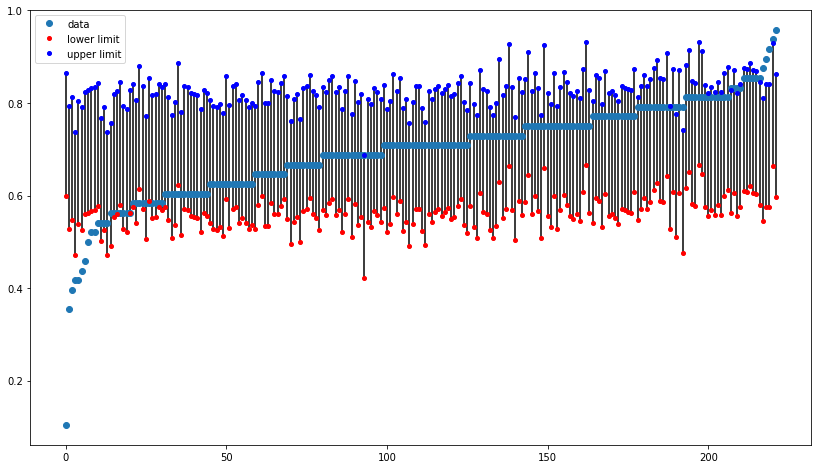

In [37]:
line_interval_plot(y_test, lb_xg, ub_xg, True)

In [38]:
print_metrics(y_test, pred_xg, lb_xg, ub_xg)

RMSE: 0.09938122911075672
Coverage: 0.8828828828828829
Mean Interval Width: 0.38166056020148903


## CatBoost

In [39]:
!pip install catboost

     |████████████████████████████████| 67.3MB 56kB/s 


In [40]:
from catboost import CatBoostRegressor

In [ ]:
cb = CatBoostRegressor()
adapted_cb = Adapt_to_CP(cb, False)
adapted_cb.fit(x_train, y_train)

In [42]:
prediction_cb = adapted_cb.calibrate_and_predict(x_cal, y_cal, x_test, 0.8)
lb_cb = prediction_cb[0]
pred_cb = prediction_cb[1]
ub_cb = prediction_cb[2]

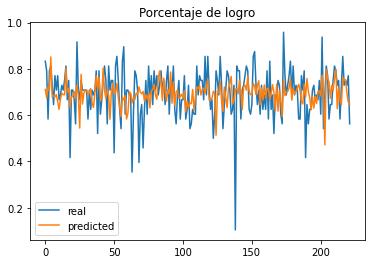

In [43]:
plot_pred(y_test, pred_cb)

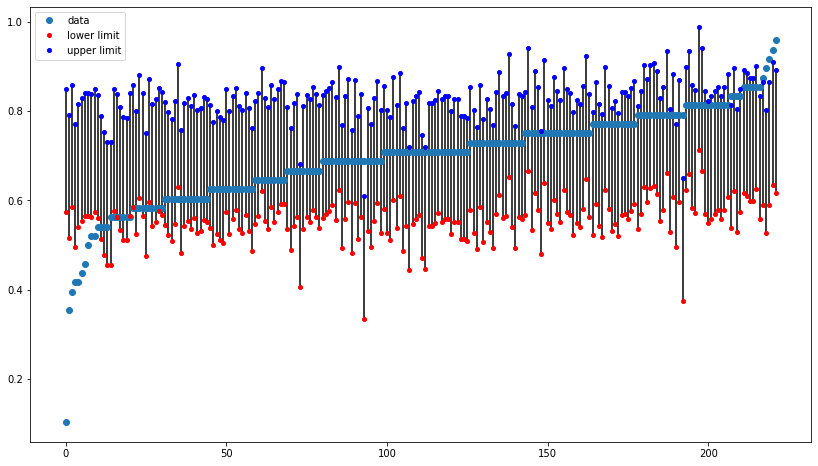

In [44]:
line_interval_plot(y_test, lb_cb, ub_cb, True)

In [45]:
print_metrics(y_test, pred_cb, lb_cb, ub_cb)

RMSE: 0.1033414066542522
Coverage: 0.8693693693693694
Mean Interval Width: 0.39495734367941515


## LightGBM

In [46]:
from lightgbm import LGBMRegressor

In [47]:
lg = LGBMRegressor()
adapted_lg = Adapt_to_CP(lg, False)
adapted_lg.fit(x_train, y_train)

In [48]:
prediction_lg = adapted_lg.calibrate_and_predict(x_cal, y_cal, x_test, 0.8)
lb_lg = prediction_lg[0]
pred_lg = prediction_lg[1]
ub_lg = prediction_lg[2]

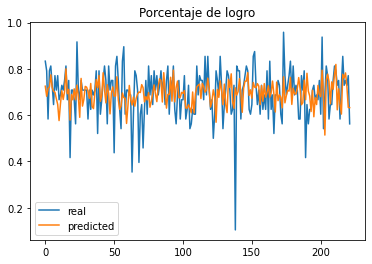

In [49]:
plot_pred(y_test, pred_lg)

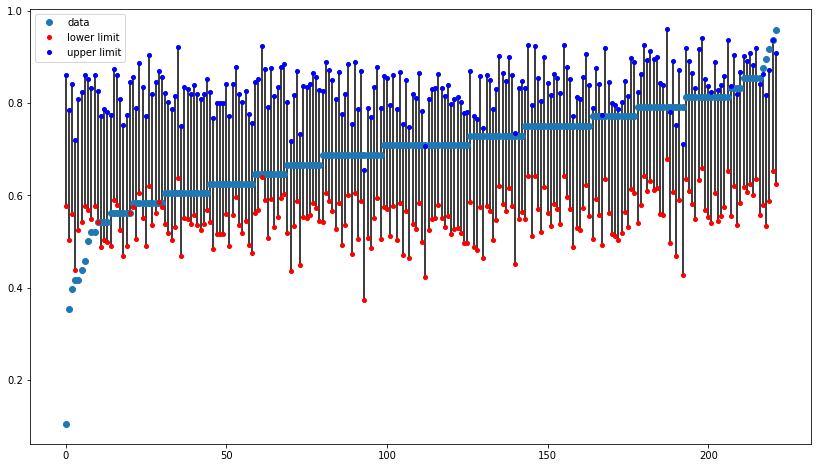

In [50]:
line_interval_plot(y_test, lb_lg, ub_lg, True)

In [51]:
print_metrics(y_test, pred_lg, lb_lg, ub_lg)

RMSE: 0.10329072527975905
Coverage: 0.8693693693693694
Mean Interval Width: 0.40721813134416224
